In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 


In [2]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
# 1. Linear Regression and Multiple Linear Regression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
# create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable
X = df[['highway-mpg']]
Y = df['price']

In [6]:
# Fit the linear model using highway-mpg.
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# Output a prediction
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
# value of the intercept
lm.intercept_

38423.305858157386

In [9]:
# value of the Slope (b)
lm.coef_

array([-821.73337832])

In [10]:
# final estimated linear model 

# price = 38423.31 - 821.73 x highway-mpg

In [11]:
# Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable

# linear model
lm2 = LinearRegression()
lm2

# fit model
x=df[['engine-size']]
y=df[['price']]
lm2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Slope
lm2.coef_

# Intercept

lm2.intercept_

# final model

print( 'price = {}  - {} * engine-size'.format(lm2.intercept_[0],lm2.coef_[0][0]))

price = -7963.338906281049  - 166.860015691416 * engine-size


In [14]:
# Multiple Linear Regression

# develop a model using these variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [15]:
# fit the model
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# Intercept
lm.intercept_

-15806.624626329198

In [27]:
# values of the coefficients (b1, b2, b3, b4)
lm.coef_[3]

36.0574888164859

In [29]:
# final model
print('Price = {} + {} x horsepower + {} x curb-weight + {} x engine-size + {} x highway-mpg'.format(lm.intercept_,lm.coef_[0],lm.coef_[1],lm.coef_[2],lm.coef_[3]))
      

Price = -15806.624626329198 + 53.495744226049275 x horsepower + 4.707700994613924 x curb-weight + 81.53026382122763 x engine-size + 36.0574888164859 x highway-mpg


In [30]:
# Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and 'highway-mpg'.
lm3 = LinearRegression()
lm3.fit(df[['normalized-losses','highway-mpg']],df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# 2) Model Evaluation using Visualization

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 48280.14551844142)

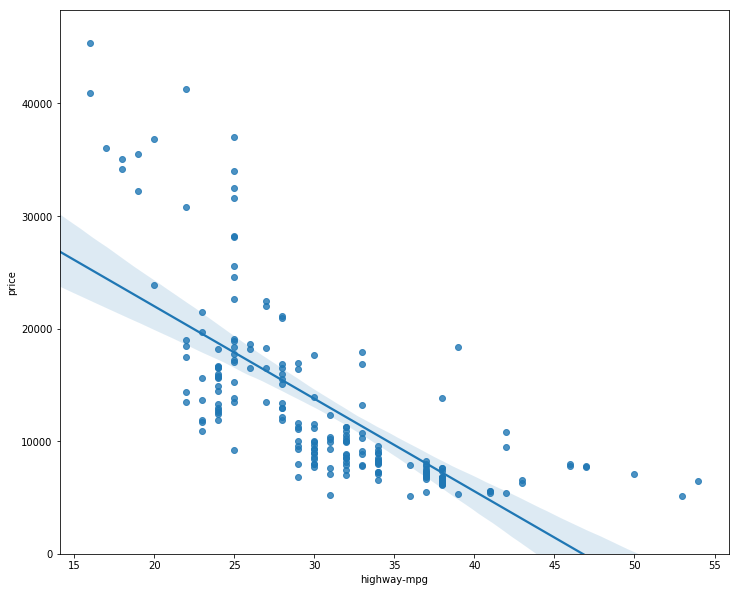

In [33]:
# visualize Horsepower as potential predictor variable of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

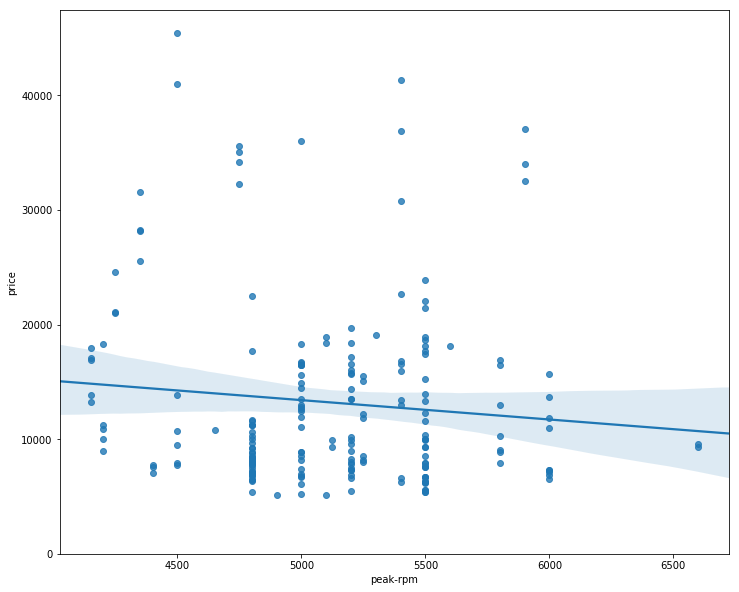

In [34]:
# Compare this plot to the regression plot of "peak-rpm".
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

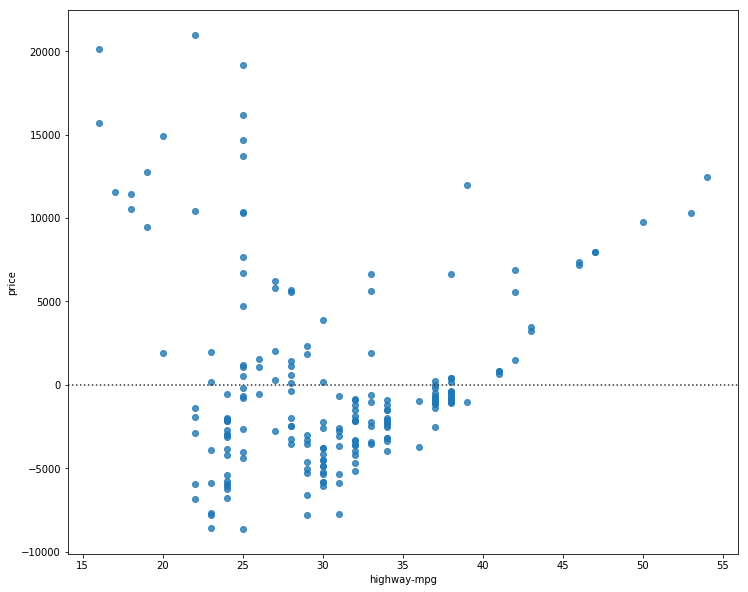

In [35]:
# Residual Plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [36]:
# # What is this plot telling us?

# We can see from this residual plot that the residuals are not randomly spread around the x-axis, 
# which leads us to believe that maybe a non-linear model is more appropriate for this data.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


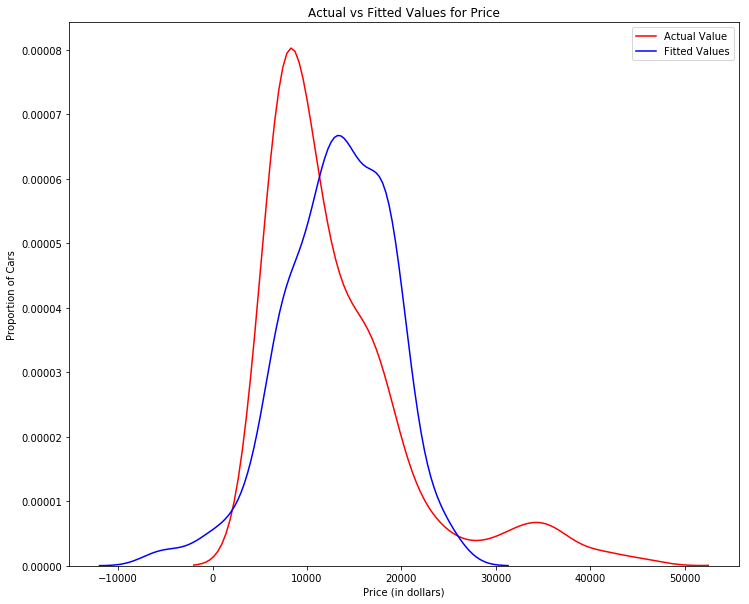

In [37]:
# Multiple Linear Regression
Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [38]:
# Part 3: Polynomial Regression and Pipelines

In [39]:
# plot function
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [40]:
# Variables
x = df['highway-mpg']
y = df['price']

In [41]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


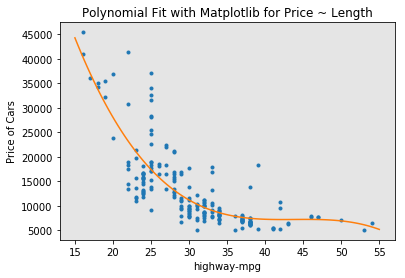

In [42]:
# Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
PlotPolly(p, x, y, 'highway-mpg')

In [43]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [44]:
# We can already see from plotting that this polynomial model performs better than the linear model. 
# This is because the generated polynomial function "hits" more of the data points.

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


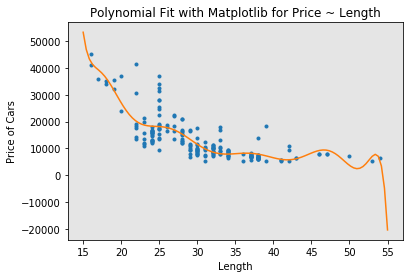

In [45]:
# Create 11 order polynomial model with the variables x and y from abovef1 = np.polyfit(x,y,11)

# calculate polynomial
# Here we use a polynomial of the 3rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Length')

In [47]:
# We create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [48]:
Z_pr=pr.fit_transform(Z)

In [49]:
# The original data is of 201 samples and 4 features
Z.shape

(201, 4)

In [50]:
# after the transformation, there 201 samples and 15 features
Z_pr.shape

(201, 15)

In [54]:
# Pipeline

# We create the pipeline, by creating a list of tuples 
# including the name of the model or estimator and its corresponding constructor.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), 
       ('model',LinearRegression())]

In [56]:
# we input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [57]:
# We can normalize the data, perform a transform and fit the model simultaneously

In [58]:
pipe.fit(Z,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [59]:
# we can normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [60]:
# Create a pipeline that Standardizes the data, 
# then perform prediction using a linear regression model using the features Z and targets y
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [61]:
# # Part 4: Measures for In-Sample Evaluation

# Two very important measures that are often used in Statistics to determine the accuracy of a model are:

#     R^2 / R-squared
#     Mean Squared Error (MSE)
#     R-squared

# R squared, also known as the coefficient of determination, 
# is a measure to indicate how close the data is to the fitted regression line.

# The value of the R-squared is the percentage of variation of the response variable (y) that 
# is explained by a linear model.

# Mean Squared Error (MSE)

#     The Mean Squared Error measures the average of the squares of errors, that is, 
#     the difference between actual value (y) and the estimated value (ŷ).

In [62]:
# Model 1: Simple Linear Regression

In [63]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


In [64]:
# We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [65]:
# MSE
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [67]:
# we compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


In [68]:
# Model 2: Multiple Linear Regression

In [69]:
# calculate the R^2

# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [70]:
#  we produce a prediction 
Y_predict_multifit = lm.predict(Z)

In [71]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [73]:
# Model 3: Polynomial Fit

# We apply the function to get the value of r^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [74]:
# We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

In [75]:
# MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

In [76]:
# Part 5: Prediction and Decision Making

# Prediction

In [77]:
# create a new input

new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [78]:
# fit the model
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
# Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

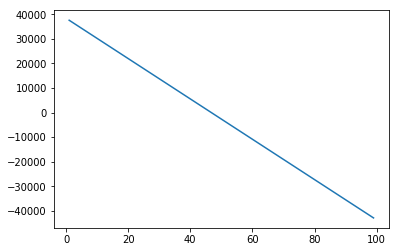

In [81]:
# plot the data
plt.plot(new_input, yhat)
plt.show()

In [83]:
# Decision Making: Determining a Good Model Fit
# Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, 
# how do we determine a good model fit?

# What is a good R-squared value?
    # When comparing models, the model with the higher R-squared value is a better fit for the data.

# What is a good MSE?
    # When comparing models, the model with the smallest MSE value is a better fit for the data.

# Let's take a look at the values for the different models.

# Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

    # R-squared: 0.49659118843391759
    # MSE: 3.16 x10^7
    
# Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

    # R-squared: 0.80896354913783497
    # MSE: 1.2 x10^7
    
# Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

    # R-squared: 0.6741946663906514
    # MSE: 2.05 x 10^7

In [ ]:
# # Conclusion:
# Comparing these three models, we conclude that 
# the MLR model is the best model to be able to predict price from our dataset. 
# This result makes sense, since we have 27 variables in total, 
# and we know that more than one of those variables are potential predictors of the final car price.